In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-11-05 18:37:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   130MB/s    in 0.8s    

2023-11-05 18:37:20 (130 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [6]:
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224,224),
    class_mode="binary",
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    class_mode="binary",
    batch_size=32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [7]:
images, labels = train_data.next()

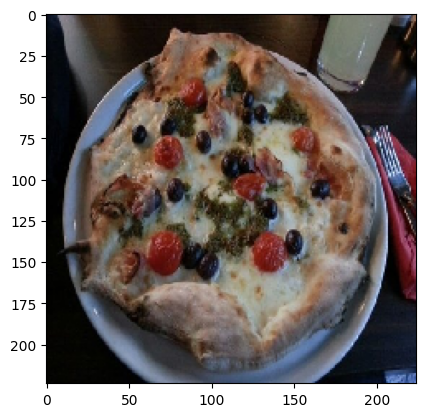

In [8]:
plt.imshow(images[27])

In [9]:
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras import Sequential

In [10]:
model_bl = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_bl.compile(optimizer=Adam(),
                 loss=tf.keras.losses.binary_crossentropy,
                 metrics=["accuracy"])

history_bl = model_bl.fit(train_data,
            batch_size=32,
            epochs=10,
            validation_data=test_data,
            validation_batch_size=32)

Epoch 1/10
47/47 [==============================] - 19s 160ms/step - loss: 0.5888 - accuracy: 0.6900 - val_loss: 0.4305 - val_accuracy: 0.7920
Epoch 2/10
47/47 [==============================] - 6s 116ms/step - loss: 0.4110 - accuracy: 0.8173 - val_loss: 0.3524 - val_accuracy: 0.8500
Epoch 3/10
47/47 [==============================] - 7s 139ms/step - loss: 0.2576 - accuracy: 0.9033 - val_loss: 0.3272 - val_accuracy: 0.8600
Epoch 4/10
47/47 [==============================] - 5s 115ms/step - loss: 0.1316 - accuracy: 0.9660 - val_loss: 0.3934 - val_accuracy: 0.8160
Epoch 5/10
47/47 [==============================] - 6s 119ms/step - loss: 0.0635 - accuracy: 0.9847 - val_loss: 0.5270 - val_accuracy: 0.7780
Epoch 6/10
47/47 [==============================] - 6s 120ms/step - loss: 0.0407 - accuracy: 0.9920 - val_loss: 0.4229 - val_accuracy: 0.8280
Epoch 7/10
47/47 [==============================] - 6s 128ms/step - loss: 0.0193 - accuracy: 0.9980 - val_loss: 0.4467 - val_accuracy: 0.8240
Epoch

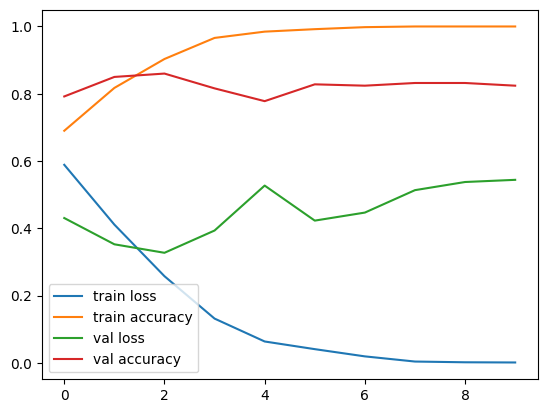

In [18]:
#plt.figure(figsize=(9,4))

#ax = plt.subplot(1,2,1)
#ax.set_title("train")
plt.plot(history_bl.epoch, history_bl.history["loss"], label="train loss")
plt.plot(history_bl.epoch, history_bl.history["accuracy"], label="train accuracy")
plt.plot(history_bl.epoch, history_bl.history["val_loss"], label="val loss")
plt.plot(history_bl.epoch, history_bl.history["val_accuracy"], label="val accuracy")
plt.legend()

# ax = plt.subplot(1,2,2)
# ax.set_title("validation")
# ax.plot(history_bl.epoch, history_bl.history["val_loss"], label="loss")
# ax.plot(history_bl.epoch, history_bl.history["val_accuracy"], label="accuracy")
# plt.legend()